In [1]:
# begin by importing necessary data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots 
train = pd.read_csv('Train.csv')
val = pd.read_csv('Validation.csv')

In [2]:
# import sklear standard scaler
from sklearn.preprocessing import StandardScaler

X_train = train[['Length03','Width03','LeafArea03']].to_numpy()
X_val = val[['Length04','Width04','LeafArea04']].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)


[0.95163402 0.03696186 0.01140412]


In [4]:
# The first principle component is accounting for > 95% of the
# variance, and the first two principle componts > 98%

# Let's keep the first 2 PC's
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

In [7]:
df = pd.DataFrame(X_train,columns = ['PC1','PC2'])
df['Target'] = train['Stage04']

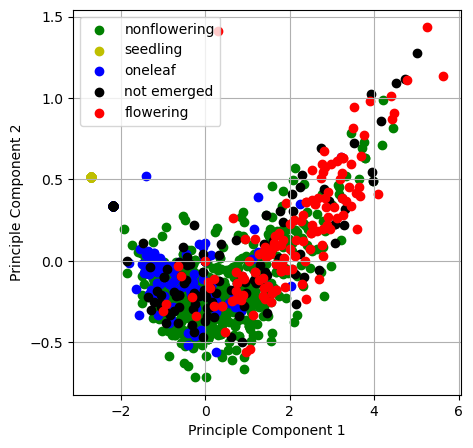

In [12]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
stages = ['nonflowering','seedling','oneleaf','not emerged','flowering']
colors = ['g','y','b','k','r']
for stage, color in zip(stages,colors):
    indices = df['Target'] == stage
    ax.scatter(df.loc[indices,"PC1"], df.loc[indices,"PC2"], c = color)
ax.legend(stages)
plt.savefig('pcaStagePlot.png',bbox_inches='tight')
ax.grid()

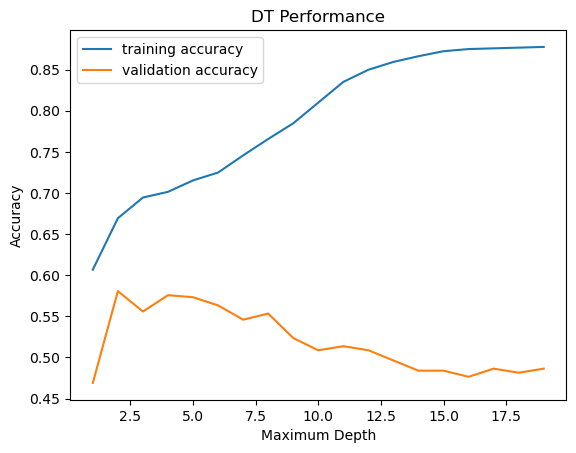

In [12]:
# can we train a decision tree on this?
from sklearn.tree import (DecisionTreeClassifier as DTC,plot_tree)
from sklearn.metrics import (accuracy_score)

# get target labels
Y_train = train['Stage04'].to_numpy()
Y_val = val['Stage05'].to_numpy()

# train decision tree algorithm
trainingAccuracy = []
validationAccuracy = []
depthValues = range(1,20)
for Depth in depthValues:
    tree = DTC(random_state = 0, max_depth = Depth, criterion = 'gini')
    tree.fit(X_train,Y_train)
    trainingAccuracy.append(accuracy_score(Y_train, tree.predict(X_train)))
    validationAccuracy.append(accuracy_score(Y_val, tree.predict(X_val)))
# plot results
plt.plot(depthValues,trainingAccuracy,label = "training accuracy")
plt.plot(depthValues,validationAccuracy,label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth")
plt.title("DT Performance")
plt.legend()
plt.show;